In [5]:
#Load libraries
import os
import pandas as pd
import numpy as np
from fancyimpute import KNN   
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from random import randrange, uniform
from sklearn.model_selection import train_test_split

In [3]:
os.chdir('/Users/maneeshagvs/documents/datasets')

os.getcwd()



'/Users/maneeshagvs/Documents/datasets'

In [200]:
#Load data
marketing_train = pd.read_csv("marketing_tr.csv")

In [7]:

#Load data
df = pd.read_csv("df.csv")


# In[ ]:


#Divide data into train and test
train, test = train_test_split(df, test_size=0.2)





In [8]:



# ## Linear Regression

# In[ ]:


#Import libraries for LR
import statsmodels.api as sm

# Train the model using the training sets
model = sm.OLS(train.iloc[:,9], train.iloc[:,0:9]).fit()


# In[ ]:


# Print out the statistics
model.summary()






<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ftv   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     10.41
Date:                Sat, 01 Jun 2019   Prob (F-statistic):           2.90e-12
Time:                        13:28:28   Log-Likelihood:                -213.75
No. Observations:                 151   AIC:                             445.5
Df Residuals:                     142   BIC:                             472.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Unnamed: 0    -0.0006      0.002     -0.295      0.768      -0.005       0.003
low           -0.0420      0.290     -0.145      0.885      -0.614       0.530
age            0.0317      0.014      2.274      0.024       0.004       0.059
lwt            0.0029      0.003      1.064      0.289      -0.002       0.008
race          -0.1065      0.089     -1.195      0.234      -0.283       0.070
smoke         -0.0045      0.185     -0.024      0.981      -0.371       0.362
ptl           -0.1247      0.189     -0.661      0.509      -0.497       0.248
ht            -0.2791      0.341     -0.818      0.415      -0.954       0.395
ui             0.0048      0.253      0.019      0.985      -0.496       0.506
==============================================================================
Omnibus:                       59.348   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.387
Skew:                           1.649   Prob(JB):                     2.21e-33
Kurtosis:                       6.610   Cond. No.                         780.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# In[ ]:


# make the predictions by the model
predictions_LR = model.predict(test.iloc[:,0:9]) 


# In[ ]:

#Calculate MAPE
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape
#Calculate MAPE
MAPE(test.iloc[:,9], predictions_LR)


# In[ ]:


#Error = 19.06



In [201]:
#Exploratory Data Analysis
marketing_train['schooling'] = marketing_train['schooling'].replace("illiterate", "unknown")
marketing_train['schooling'] = marketing_train['schooling'].replace(["basic.4y","basic.6y","basic.9y","high.school","professional.course"], "high.school")
marketing_train['default'] = marketing_train['default'].replace("yes", "unknown")
marketing_train['marital'] = marketing_train['marital'].replace("unknown", "married")
marketing_train['month'] = marketing_train['month'].replace(["sep","oct","mar","dec"], "dec")
marketing_train['month'] = marketing_train['month'].replace(["aug","jul","jun","may","nov"], "jun")
marketing_train['loan'] = marketing_train['loan'].replace("unknown", "no")
marketing_train['profession'] = marketing_train['profession'].replace(["management","unknown","unemployed","admin."], "admin.")
marketing_train['profession'] = marketing_train['profession'].replace(["blue-collar","housemaid","services","self-employed","entrepreneur","technician"], "blue-collar")

## Missing Value Analysis


In [202]:
#Create dataframe with missing percentage
missing_val = pd.DataFrame(marketing_train.isnull().sum())

#Reset index
missing_val = missing_val.reset_index()

#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

#Calculate percentage
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(marketing_train))*100

#descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)

#save output results 
missing_val.to_csv("Miising_perc.csv", index = False)

In [123]:
#imputation method
#Actual value = 29
#Mean = 40.01
#Median = 38
#KNN = 29.35

#create missing value
#marketing_train['custAge'].loc[70] = np.nan

In [124]:
#Impute with mean
#marketing_train['custAge'] = marketing_train['custAge'].fillna(marketing_train['custAge'].mean())

#Impute with median
#marketing_train['custAge'] = marketing_train['custAge'].fillna(marketing_train['custAge'].median())

In [203]:
#KNN imputation
#Assigning levels to the categories
lis = []
for i in range(0, marketing_train.shape[1]):
    #print(i)
    if(marketing_train.iloc[:,i].dtypes == 'object'):
        marketing_train.iloc[:,i] = pd.Categorical(marketing_train.iloc[:,i])
        #print(marketing_train[[i]])
        marketing_train.iloc[:,i] = marketing_train.iloc[:,i].cat.codes 
        marketing_train.iloc[:,i] = marketing_train.iloc[:,i].astype('object')
        
        lis.append(marketing_train.columns[i])
        

In [126]:
#replace -1 with NA to impute
for i in range(0, marketing_train.shape[1]):
    marketing_train.iloc[:,i] = marketing_train.iloc[:,i].replace(-1, np.nan)

In [127]:
#KNN Complete is replaced by .fit_transform to match the SK_learn 

#Apply KNN imputation algorithm
marketing_train = pd.DataFrame(KNN(k = 3).fit_transform(marketing_train), columns = marketing_train.columns)

Imputing row 1/7414 with 0 missing, elapsed time: 13.959
Imputing row 101/7414 with 1 missing, elapsed time: 13.965
Imputing row 201/7414 with 0 missing, elapsed time: 13.970
Imputing row 301/7414 with 1 missing, elapsed time: 13.976
Imputing row 401/7414 with 0 missing, elapsed time: 13.980
Imputing row 501/7414 with 0 missing, elapsed time: 13.985
Imputing row 601/7414 with 0 missing, elapsed time: 13.991
Imputing row 701/7414 with 1 missing, elapsed time: 13.996
Imputing row 801/7414 with 1 missing, elapsed time: 14.001
Imputing row 901/7414 with 1 missing, elapsed time: 14.006
Imputing row 1001/7414 with 0 missing, elapsed time: 14.011
Imputing row 1101/7414 with 1 missing, elapsed time: 14.017
Imputing row 1201/7414 with 1 missing, elapsed time: 14.023
Imputing row 1301/7414 with 1 missing, elapsed time: 14.029
Imputing row 1401/7414 with 0 missing, elapsed time: 14.034
Imputing row 1501/7414 with 1 missing, elapsed time: 14.039
Imputing row 1601/7414 with 1 missing, elapsed time:

In [128]:
#Convert into proper datatypes

#solution for round off error - https://stackoverflow.com/questions/19387608/attributeerror-rint-when-using-numpy-round


for i in lis:
    marketing_train.loc[:,i] = np.around(marketing_train.loc[:,i].astype(np.double),3)
    marketing_train.loc[:,i] = marketing_train.loc[:,i].astype('object')


## Outlier Analysis

In [129]:
df = marketing_train.copy()
marketing_train = df.copy()

{'boxes': [<matplotlib.lines.Line2D at 0x1a304ec450>],
 'caps': [<matplotlib.lines.Line2D at 0x1a30aaae90>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a31713a10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a31713650>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a30aaa710>,
  <matplotlib.lines.Line2D at 0x1a30aaaad0>]}

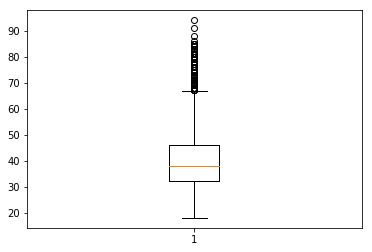

In [130]:
# #Plot boxplot to visualize Outliers
%matplotlib inline  
plt.boxplot(marketing_train['custAge'])

In [131]:
#save numeric names
cnames =  ["custAge", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m",
           "nr.employed", "pmonths", "pastEmail"]

In [132]:
# #Detect and delete outliers from data
# for i in cnames:
#     print(i)
#     q75, q25 = np.percentile(marketing_train.loc[:,i], [75 ,25])
#     iqr = q75 - q25

#     min = q25 - (iqr*1.5)
#     max = q75 + (iqr*1.5)
#     print(min)
#     print(max)
    
#     marketing_train = marketing_train.drop()
#     marketing_train = marketing_train.drop(marketing_train[marketing_train.loc[:,i] > max].index)

In [133]:
#Detect and replace with NA
# #Extract quartiles
# q75, q25 = np.percentile(marketing_train['custAge'], [75 ,25])

# #Calculate IQR
# iqr = q75 - q25

# #Calculate inner and outer fence
# minimum = q25 - (iqr*1.5)
# maximum = q75 + (iqr*1.5)

# #Replace with NA
# marketing_train.loc[marketing_train['custAge'] < minimum,:'custAge'] = np.nan
# marketing_train.loc[marketing_train['custAge'] > maximum,:'custAge'] = np.nan

# #Calculate missing value
# missing_val = pd.DataFrame(marketing_train.isnull().sum())

# #Impute with KNN
# marketing_train = pd.DataFrame(KNN(k = 3).complete(marketing_train), columns = marketing_train.columns)

## Feature Selection

In [134]:
##Correlation analysis
#Correlation plot
df_corr = marketing_train.loc[:,cnames]

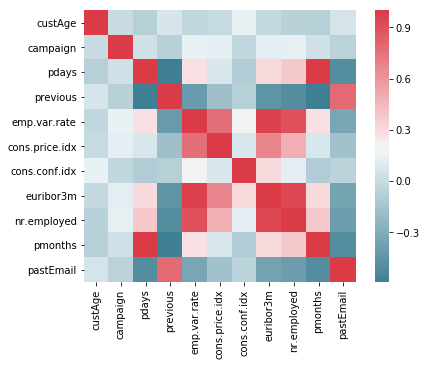

In [135]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [136]:
#Chisquare test of independence
#Save categorical variables
cat_names = ["profession", "marital", "schooling", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]

In [137]:
#loop for chi square values
for i in cat_names:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(marketing_train['responded'], marketing_train[i]))
    print(p)

profession
1.6242589537712605e-34
marital
4.693435664866768e-05
schooling
3.0802565674571545e-34
default
1.626010224096433e-15
housing
0.5469213692385477
loan
0.09547438986454948
contact
4.416434113838791e-36
month
3.3492292613263237e-139
day_of_week
2.3175048561931414e-12
poutcome
3.898575747043989e-181


In [138]:
marketing_train = marketing_train.drop(['pdays', 'emp.var.rate', 'day_of_week', 'loan', 'housing'], axis=1)

## Feature Scaling

In [139]:
#df = marketing_train.copy()
#marketing_train = df.copy()

(array([3.193e+03, 0.000e+00, 0.000e+00, 0.000e+00, 1.953e+03, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 9.560e+02, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 4.770e+02, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.450e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.790e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+02,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 6.600e+01, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 6.100e+01, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 3.600e+01, 0.000e+00, 0.000e+00, 0.000e+00,
        3.800e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.100e+01,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.400e+01, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.300e+01, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 7.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 7.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        8.000e+00, 0.000e+00, 0.000e+0

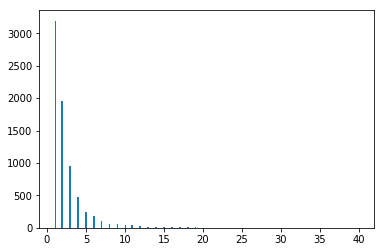

In [140]:
#Normality check
%matplotlib inline  
plt.hist(marketing_train['campaign'], bins='auto')

In [141]:
cnames = ["custAge","campaign","previous","cons.price.idx","cons.conf.idx","euribor3m","nr.employed",
           "pmonths","pastEmail"]

In [142]:
#Nomalisation
for i in cnames:
    print(i)
    marketing_train[i] = (marketing_train[i] - min(marketing_train[i]))/(max(marketing_train[i]) - min(marketing_train[i]))

custAge
campaign
previous
cons.price.idx
cons.conf.idx
euribor3m
nr.employed
pmonths
pastEmail


In [143]:
# #Standarisation
# for i in cnames:
#     print(i)
#     marketing_train[i] = (marketing_train[i] - marketing_train[i].mean())/marketing_train[i].std()

## Sampling Techniques

In [144]:
##Simple random sampling
#Sim_Sampling = marketing_train.sample(5000)

In [145]:
# ##Systematic Sampling
# #Calculate the K value
# k = len(marketing_train)/3500

# # Generate a random number using simple random sampling
# RandNum = randrange(0, 5)

# #select Kth observation starting from RandNum
# Sys_Sampling = marketing_train.iloc[RandNum::k, :]

In [146]:
# #Stratified sampling
# from sklearn.cross_validation import train_test_split

# #Select categorical variable
# y = marketing_train['profession']

#select subset using stratified Sampling
#Rest, Sample = train_test_split(marketing_train, test_size = 0.6, stratify = y)

In [147]:
#marketing_train = pd.read_csv("marketing_train_Model.csv")

## Model Development

In [149]:
#Import Libraries for decision tree
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [245]:
#replace target categories with Yes or No
marketing_train['responded'] = marketing_train['responded'].replace(0, 'No')
marketing_train['responded'] = marketing_train['responded'].replace(1, 'Yes')

marketing_train.to_csv('Naived_sample',index=False)


In [151]:
#Divide data into train and test
X = marketing_train.values[:, 0:16]
Y = marketing_train.values[:,16]

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2)

In [152]:
#Decision Tree
C50_model = tree.DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)

#predict new test cases
C50_Predictions = C50_model.predict(X_test)

#Create dot file to visualise tree  #http://webgraphviz.com/
# dotfile = open("pt.dot", 'w')
# df = tree.export_graphviz(C50_model, out_file=dotfile, feature_names = marketing_train.columns)

In [153]:
#build confusion matrix
# from sklearn.metrics import confusion_matrix 
# CM = confusion_matrix(y_test, y_pred)
CM = pd.crosstab(y_test, C50_Predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
((TP+TN)*100)/(TP+TN+FP+FN)

#False Negative rate 
#(FN*100)/(FN+TP)

#Results
#Accuracy: 84.49
#FNR: 63

83

In [154]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators = 20).fit(X_train, y_train)

In [155]:
RF_Predictions = RF_model.predict(X_test)

In [156]:
#build confusion matrix
# from sklearn.metrics import confusion_matrix 
# CM = confusion_matrix(y_test, y_pred)
CM = pd.crosstab(y_test, RF_Predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
((TP+TN)*100)/(TP+TN+FP+FN)

#False Negative rate 
#(FN*100)/(FN+TP)

#Accuracy: 88
#FNR: 67

88

In [158]:
#Let us prepare data for logistic regression
#replace target categories with Yes or No
marketing_train['responded'] = marketing_train['responded'].replace('No', 0)
marketing_train['responded'] = marketing_train['responded'].replace('Yes', 1)


In [186]:
#Create logistic data. Save target variable first
marketing_train_logit = pd.DataFrame(marketing_train['responded'])

In [187]:
#Add continous variables
marketing_train_logit = marketing_train_logit.join(marketing_train[cnames])

In [188]:
marketing_train_logit.head()

,responded,custAge,campaign,previous,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail
0,0,0.486842,0.000000,0.000000,0.389322,0.368201,0.806393,0.877883,1.0,0.000000
1,0,0.320175,0.000000,0.000000,0.669135,0.338912,0.980730,1.000000,1.0,0.000000
2,0,0.315789,0.000000,0.000000,0.698753,0.602510,0.957379,0.859735,1.0,0.000000
3,0,0.486842,0.025641,0.000000,0.669135,0.338912,0.981183,1.000000,1.0,0.000000
4,0,0.257879,0.102564,0.166667,0.269680,0.192469,0.148946,0.512287,1.0,0.055556


In [189]:
##Create dummies for categorical variables
cat_names = ["profession", "marital", "schooling", "default", "contact", "month", "poutcome"]

for i in cat_names:
        temp = pd.get_dummies(marketing_train[i], prefix = i)
        marketing_train_logit = marketing_train_logit.join(temp)
    
    



In [190]:
Sample_Index = np.random.rand(len(marketing_train_logit))<0.8

train = marketing_train_logit[Sample_Index]
test = marketing_train_logit[~Sample_Index]
                             

In [191]:
#select column indexes for independent variables
train_cols = train.columns[1:30]


train_cols

Index([u'custAge', u'campaign', u'previous', u'cons.price.idx',
       u'cons.conf.idx', u'euribor3m', u'nr.employed', u'pmonths',
       u'pastEmail', u'profession_0.0', u'profession_1.0', u'profession_2.0',
       u'profession_3.0', u'marital_0.0', u'marital_1.0', u'marital_2.0',
       u'schooling_0.0', u'schooling_0.001', u'schooling_0.002',
       u'schooling_0.003', u'schooling_0.004', u'schooling_0.005',
       u'schooling_0.006', u'schooling_0.007', u'schooling_0.009',
       u'schooling_0.011', u'schooling_0.013', u'schooling_0.014',
       u'schooling_0.022'],
      dtype='object')

In [192]:
#Built Logistic Regression
import statsmodels.api as sm

logit = sm.Logit(train['responded'], train[train_cols]).fit()



         Current function value: 0.282665
         Iterations: 35


/anaconda3/envs/DataScience/lib/python2.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [193]:
#Predict test data
test['Actual_prob'] = logit.predict(test[train_cols])

test['ActualVal'] = 1
test.loc[test.Actual_prob < 0.5, 'ActualVal'] = 0

/anaconda3/envs/DataScience/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/envs/DataScience/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/envs/DataScience/lib/python2.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [194]:
#Build confusion matrix
CM = pd.crosstab(test['responded'], test['ActualVal'])

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
((TP+TN)*100)/(TP+TN+FP+FN)

(FN*100)/(FN+TP)

81

In [195]:
#Accuracy: 90
#FNR: 74

In [219]:
#KNN implementation
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train)

In [220]:
#predict test cases
KNN_Predictions = KNN_model.predict(X_test)

In [246]:
#build confusion matrix
CM = pd.crosstab(y_test, KNN_Predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
((TP+TN)*100)/(TP+TN+FP+FN)

#False Negative rate 
#(FN*100)/(FN+TP)

#Accuracy: 89
#FNR: 76

87

In [247]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB




#Naive Bayes implementation
NB_model = GaussianNB().fit(X_train, y_train)






In [248]:
#predict test cases
NB_Predictions = NB_model.predict(X_test)

In [249]:
#Build confusion matrix
CM = pd.crosstab(y_test, NB_Predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
((TP+TN)*100)/(TP+TN+FP+FN)

#False Negative rate 
#(FN*100)/(FN+TP)

#Accuracy: 81
#FNR: 40

81

## Cluster Analysis

In [278]:
#Load data
df = pd.read_csv("iris.csv")

In [279]:
#Load required libraries
from sklearn.cluster import KMeans


#Estimate optimum number of clusters
cluster_range = range( 1, 20 )
cluster_errors = []
#cluster.inertia will provide the errors available

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters).fit(df.iloc[:,0:4])
    cluster_errors.append(clusters.inertia_)
    
#Create dataframe with cluster errors
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df.head()

,cluster_errors,num_clusters
0,281832.300667,1
1,70581.716000,2
2,31320.640800,3
3,17790.988321,4
4,11423.428980,5


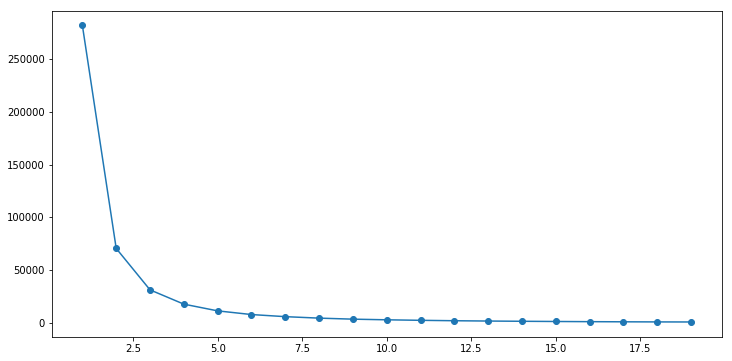

In [280]:
#Plot line chart to visualise number of clusters
%matplotlib inline  
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [281]:
#Implement kmeans
kmeans_model = KMeans(n_clusters = 3).fit(df.iloc[:,0:4])



In [282]:
#Summarize output
pd.crosstab(df['Species'], kmeans_model.labels_)

col_0,0,1,2
Species,,,
setosa,0,50,0
versicolor,0,0,50
virginica,50,0,0


In [283]:
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( df.iloc[:,0:4] )
    cluster_errors.append( clusters.inertia_ )

In [272]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

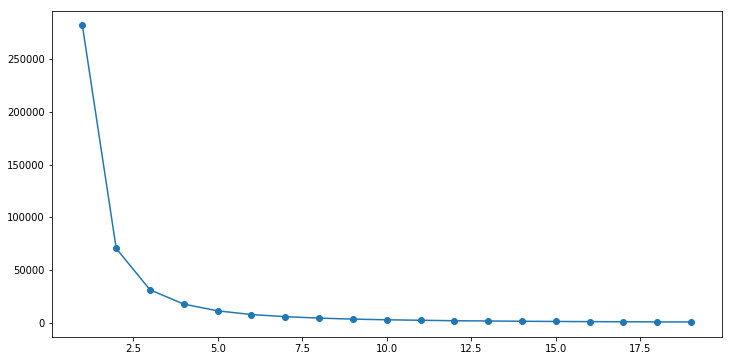

In [273]:
%matplotlib inline  

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )